**02: EDA**

Importing required modules

In [69]:
#linear algebra
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#extra
import os
import pickle
import datetime
import warnings

In [70]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Directory variables

In [71]:
processed_data_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs\processed_data.pkl"

Loading data

In [72]:
def load_processed_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

In [73]:
data = load_processed_data(processed_data_path)
# data.set_index("week_start_date",inplace=True)

In [74]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


**Data Visualisation**

*City and date indicators*
- city – City abbreviations: sj for San Juan and iq for Iquitos
- week_start_date – Date given in yyyy-mm-dd format

*NOAA's GHCN daily climate data weather station measurements*
- station_max_temp_c – Maximum temperature
- station_min_temp_c – Minimum temperature
- station_avg_temp_c – Average temperature
- station_precip_mm – Total precipitation
- station_diur_temp_rng_c – Diurnal temperature range

*PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)*
- precipitation_amt_mm – Total precipitation
- NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
- reanalysis_sat_precip_amt_mm – Total precipitation
- reanalysis_dew_point_temp_k – Mean dew point temperature
- reanalysis_air_temp_k – Mean air temperature
- reanalysis_relative_humidity_percent – Mean relative humidity
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity
- reanalysis_precip_amt_kg_per_m2 – Total precipitation
- reanalysis_max_air_temp_k – Maximum air temperature
- reanalysis_min_air_temp_k – Minimum air temperature
- reanalysis_avg_temp_k – Average air temperature
- reanalysis_tdtr_k – Diurnal temperature range

*Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements*
- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid

In [75]:
sns.set_style("darkgrid")

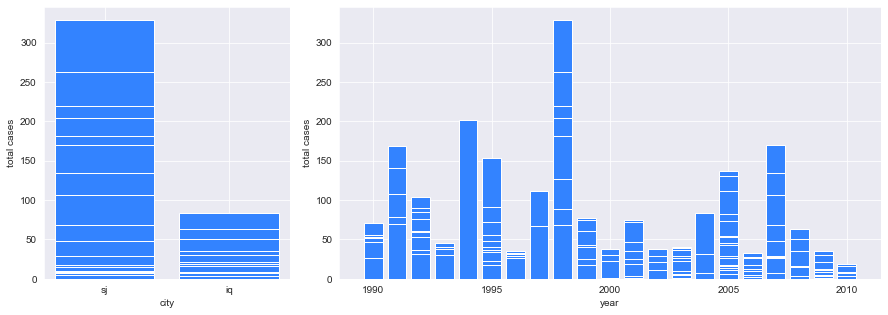

In [76]:
plt.figure(figsize=(15,5))

x1 = plt.subplot2grid((1,3),(0,0))
x1 = plt.bar(data.city,data.total_cases,color="#3383FF")
plt.xlabel("city")
plt.ylabel("total cases")


x2 = plt.subplot2grid((1,3),(0,1),colspan=2)
x2 = plt.bar(data.year,data.total_cases,color="#3383FF")
plt.xlabel("year")
plt.ylabel("total cases")

plt.show()

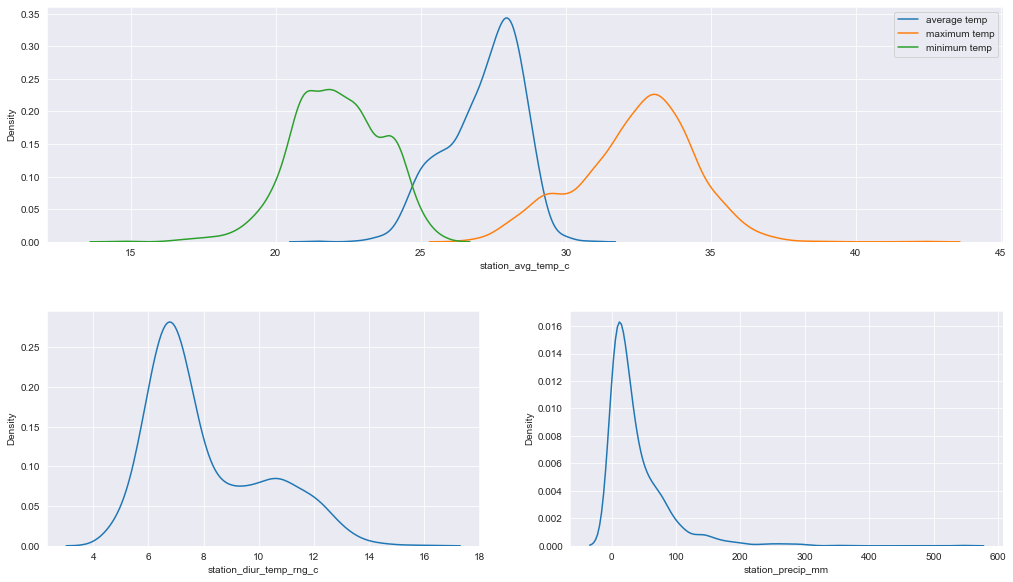

In [100]:
plt.figure(figsize=(15,9))
# stations_cols = data.loc[:,"station_avg_temp_c":"station_precip_mm"].columns

x1  = plt.subplot2grid((2,2),(0,0),colspan=2)
x1 = sns.kdeplot(data.station_avg_temp_c,label="average temp")
x1 = sns.kdeplot(data.station_max_temp_c,label="maximum temp")
x1 = sns.kdeplot(data.station_min_temp_c,label="minimum temp")
plt.legend()

x2 = plt.subplot2grid((2,2),(1,0))
x2 = sns.kdeplot(data.station_diur_temp_rng_c,label="average temp")

x3 = plt.subplot2grid((2,2),(1,1))
x3 = sns.kdeplot(data.station_precip_mm,label="average temp")

plt.tight_layout(pad=4)
plt.show()

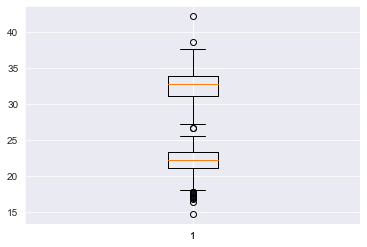

In [103]:
plt.boxplot(data.station_max_temp_c)
plt.boxplot(data.station_min_temp_c)
plt.show()